In [22]:
# Import packages
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

In [23]:
# Set working directory
os.chdir(os.path.expanduser('~/Desktop/Media Bias Project'))

# Load the dataset
df = pd.read_csv('data/new_labeled_dataset.csv')

In [24]:
# Turn strings into lists
if isinstance(df['biased_words4'].iloc[0], str):
    df['biased_words4'] = df['biased_words4'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# %pip install nltk (run this line if you have not installed the package)
import nltk
from nltk.corpus import stopwords

# Download stopwords list the first time you run this
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Filter out stopwords from all_biased_words list
all_biased_words = [word for sublist in df['biased_words4'] for word in sublist]
filtered_biased_words = [w for w in all_biased_words if w.lower() not in stop_words]

# Calculate word frequency
filtered_word_counts = Counter(filtered_biased_words)

# Print the top 20 biased words with high frequency
print("Top 20 filtered biased words:\n", filtered_word_counts.most_common(20))

Top 20 filtered biased words:
 [('white', 28), ('radical', 14), ('massive', 13), ('pro-life', 11), ('slammed', 11), ('false', 11), ('threatened', 11), ('dangerous', 11), ('illegal', 11), ('racist', 11), ('nationalist', 11), ('abortion', 10), ('extreme', 9), ('conspiracy', 9), ('crisis', 8), ('dramatically', 8), ('rhetoric', 8), ('propaganda', 7), ('anti-choice', 7), ('nationalism', 7)]


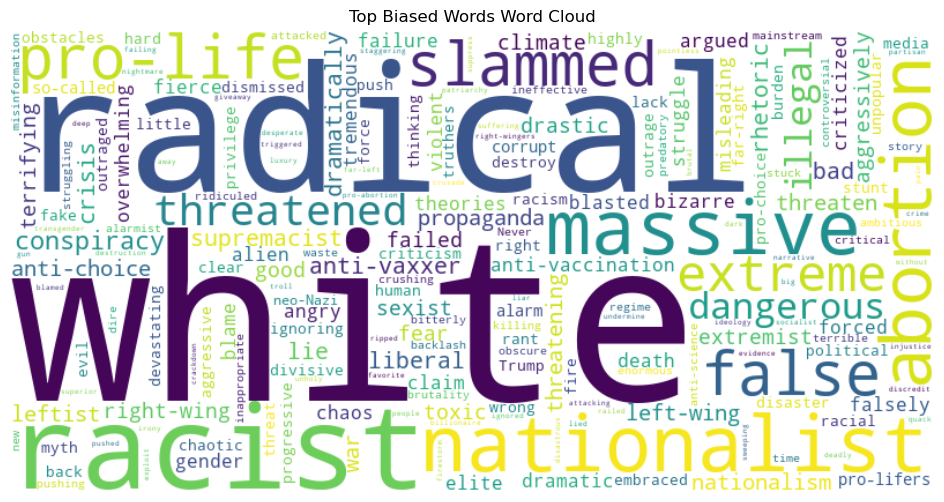

In [25]:
# %pip install wordcloud
from wordcloud import WordCloud

# Join words into a single string (as required by WordCloud)
text = ' '.join(filtered_biased_words)

custom_pattern = r'\b[a-zA-Z][a-zA-Z-]*[a-zA-Z]\b'

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, regexp=custom_pattern).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Biased Words Word Cloud')
plt.show()

In [26]:
# Remove stopwords from the "biased_words4" column
df['biased_words4'] = df['biased_words4'].apply(lambda wordlist: [w for w in wordlist if w.lower() not in stop_words])

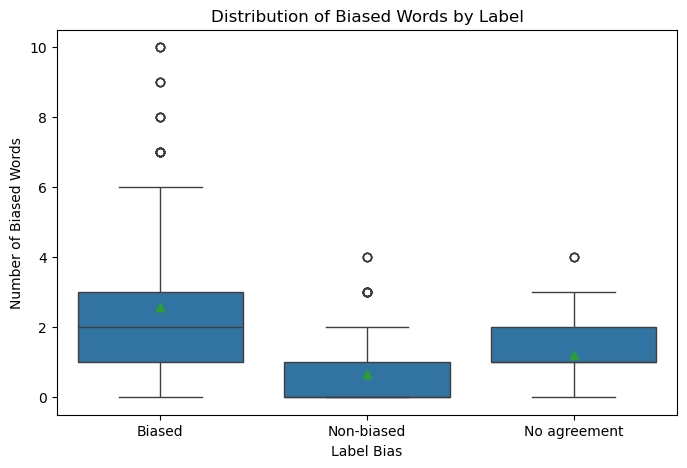

In [27]:
df['n_biased_words'] = df['biased_words4'].apply(len)

plt.figure(figsize=(8,5))
sns.boxplot(x='Label_bias', y='n_biased_words', data=df, showmeans=True)
plt.title('Distribution of Biased Words by Label')
plt.xlabel('Label Bias')
plt.ylabel('Number of Biased Words')
plt.show()

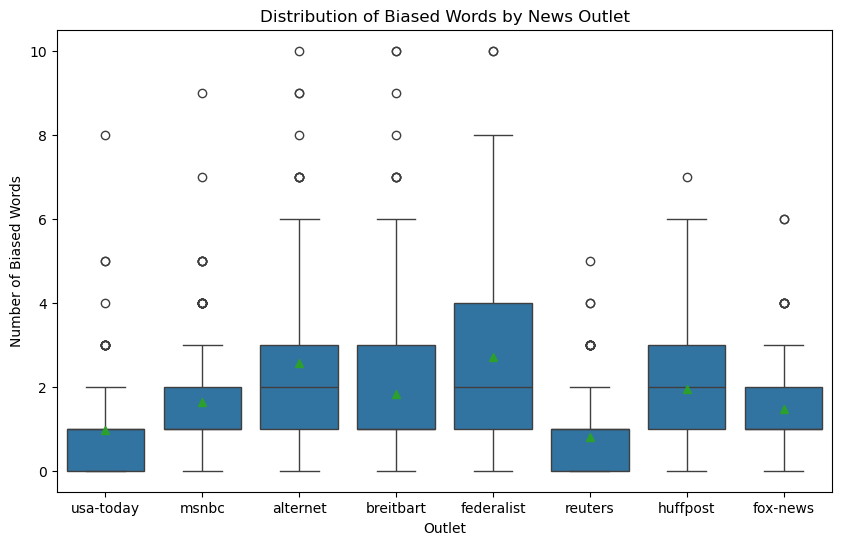

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='outlet', y='n_biased_words', data=df, showmeans=True)
plt.title('Distribution of Biased Words by News Outlet')
plt.xlabel('Outlet')
plt.ylabel('Number of Biased Words')
plt.show()

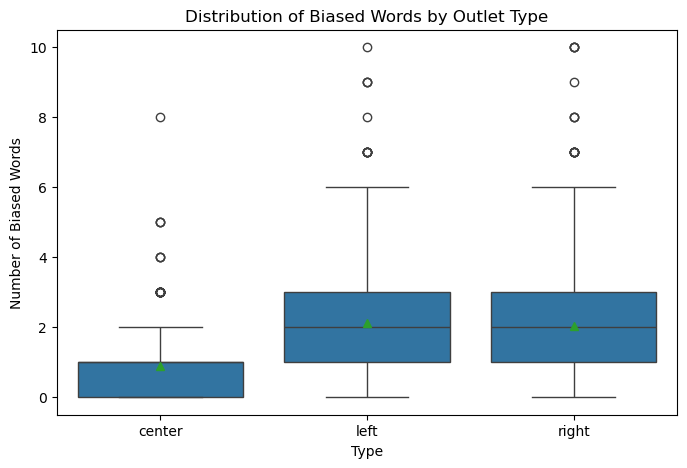

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='n_biased_words', data=df, showmeans=True)
plt.title('Distribution of Biased Words by Outlet Type')
plt.xlabel('Type')
plt.ylabel('Number of Biased Words')
plt.show()

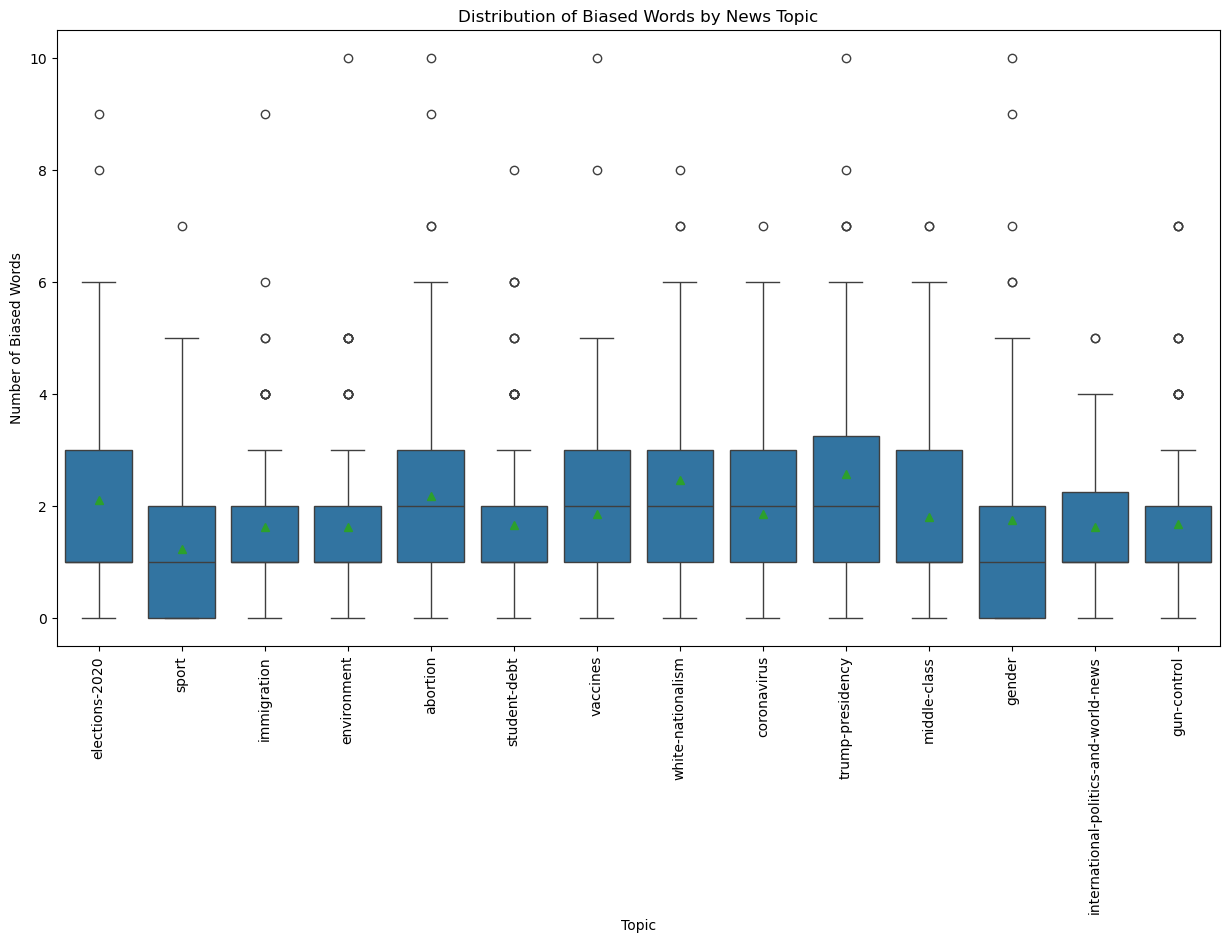

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='topic', y='n_biased_words', data=df, showmeans=True)
plt.title('Distribution of Biased Words by News Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Biased Words')
plt.xticks(rotation=90)  # Add this line to rotate the labels
plt.show()

In [31]:
# Get proportions of label_bias by each news outlet
outlet_bias_props = df.groupby('outlet')['Label_bias'].value_counts(normalize=True).unstack()
print("Proportion of label_bias by outlet:\n", outlet_bias_props)

# Proportions by type
type_bias_props = df.groupby('type')['Label_bias'].value_counts(normalize=True).unstack()
print("Proportion of label_bias by type:\n", type_bias_props)


Proportion of label_bias by outlet:
 Label_bias    Biased  No agreement  Non-biased
outlet                                        
alternet    0.795858      0.085799    0.118343
breitbart   0.602122      0.106101    0.291777
federalist  0.866995      0.044335    0.088670
fox-news    0.450450      0.144144    0.405405
huffpost    0.701754      0.078947    0.219298
msnbc       0.528926      0.078512    0.392562
reuters     0.265823      0.050633    0.683544
usa-today   0.292994      0.121019    0.585987
Proportion of label_bias by type:
 Label_bias    Biased  No agreement  Non-biased
type                                          
center      0.279365      0.085714    0.634921
left        0.687320      0.082133    0.230548
right       0.655572      0.094067    0.250362


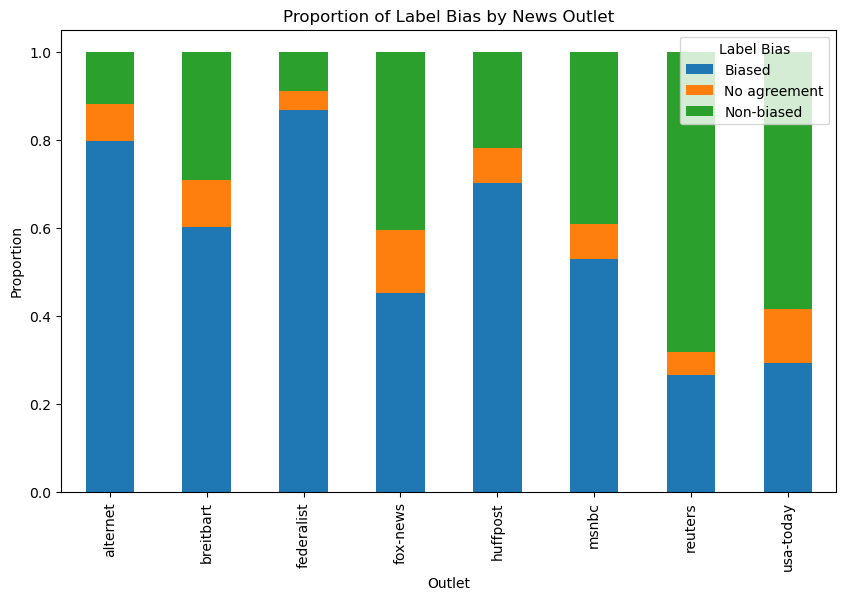

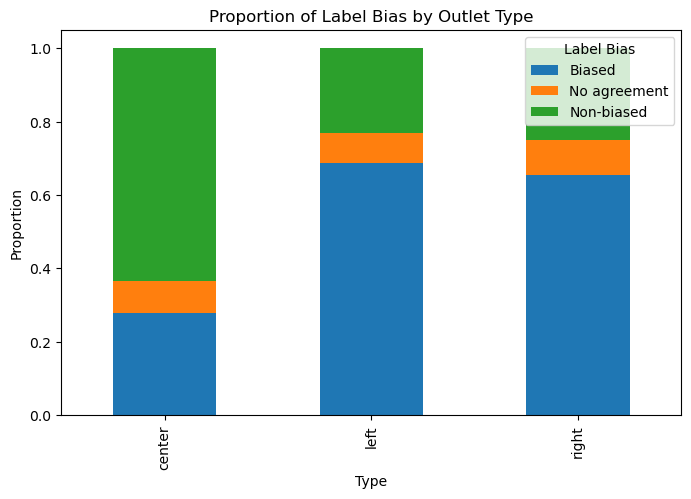

In [32]:
# Visualization
# Stacked bar plot for outlets
outlet_bias_props.plot(kind='bar', stacked=True, figsize=(10,6),
                             title='Proportion of Label Bias by News Outlet')
plt.ylabel('Proportion')
plt.xlabel('Outlet')
plt.legend(title='Label Bias')
plt.show()

# Stacked bar plot for type
type_bias_props.plot(kind='bar', stacked=True, figsize=(8,5),
                           title='Proportion of Label Bias by Outlet Type')
plt.ylabel('Proportion')
plt.xlabel('Type')
plt.legend(title='Label Bias')
plt.show()

In [33]:
# Break down label bias by news topic
topic_bias_props = df.groupby('topic')['Label_bias'].value_counts(normalize=True).unstack()
print("Proportion of label_bias by topic:\n", topic_bias_props)


Proportion of label_bias by topic:
 Label_bias                               Biased  No agreement  Non-biased
topic                                                                    
abortion                               0.674603      0.103175    0.222222
coronavirus                            0.573770      0.131148    0.295082
elections-2020                         0.657658      0.054054    0.288288
environment                            0.548148      0.133333    0.318519
gender                                 0.523438      0.062500    0.414062
gun-control                            0.596774      0.072581    0.330645
immigration                            0.540984      0.106557    0.352459
international-politics-and-world-news  0.522727      0.136364    0.340909
middle-class                           0.644068      0.042373    0.313559
sport                                  0.357143      0.103175    0.539683
student-debt                           0.590551      0.086614    0.322835
tr

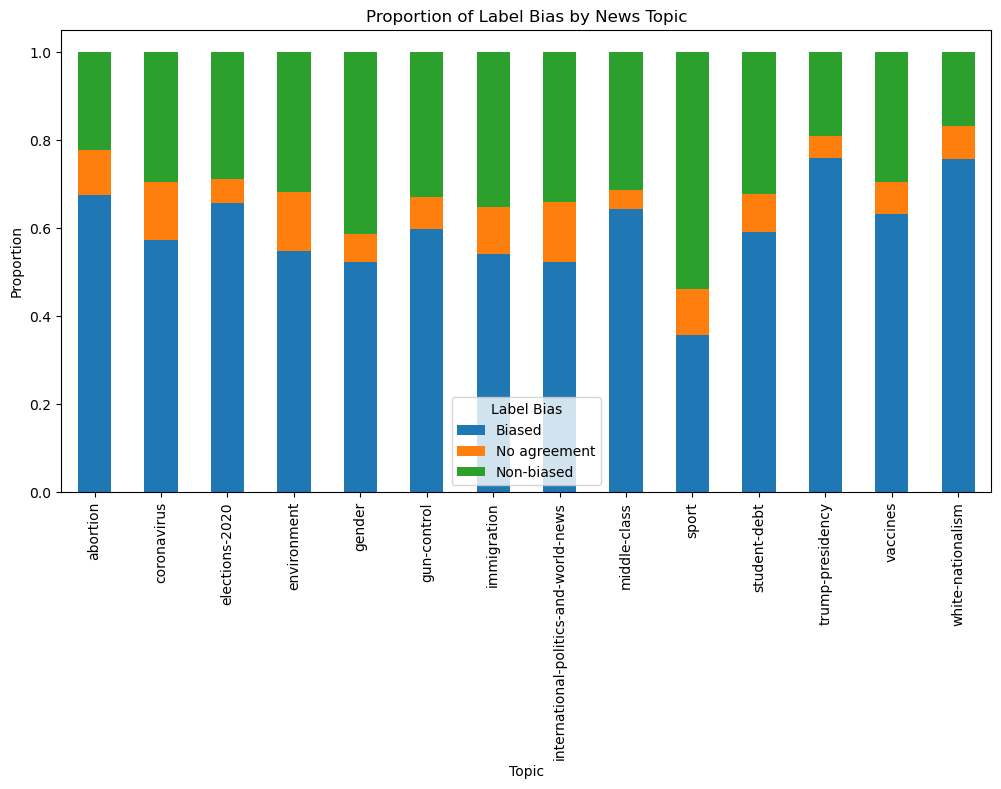

In [34]:
# Stacked bar plot for topics
topic_bias_props.plot(kind='bar', stacked=True, figsize=(12,6),
                             title='Proportion of Label Bias by News Topic')
plt.ylabel('Proportion')
plt.xlabel('Topic')
plt.legend(title='Label Bias')
plt.show()